<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project - DAPI3

## EDA + Data Visualization with Pandas 
  
### Ahad Al Seraihi

#### 21st April 2021
---

### Contents:

- [1. Choosing a Dataset: COVID-19 World Vaccination Progress (12/2020 - 04/2021)](#the-dataset)
- [2. Importing Python Libraries (Pandas, NumPy, Seaborn and Matplotlib](#importing-libraries)
- [3. Loading the Dataset](#loading-data)
- [4. Basic Exploratory Data Analysis (EDA)](#EDA)
   - [Core Python Topics](#core)
- [5. Data Cleaning and Wrangling](#data-cleaning)
- [6. Hypothesis-driven EDA + Visualization](#hypotheses)  
- [7. Data Visualization](#data-visualization)

<a id="the-dataset"></a>
<img src="https://www.meed.com/Uploads/NewsArticle/8407005/main0804.gif" style="float: right; margin: 70px; height: 90px">

### 1. Choosing a Dataset: 
### COVID-19 World Vaccination Progress (12/2020 - 04/2021)
---
**Acknowledgement**: this dataset was obtained from an open data source (kaggle.com) and the data was originally collected from Our World in Data.

The data dictionary can be found [here](https://drive.google.com/file/d/1kOraCmd_2TSEde1eXH23AmQWBh0AGVLW/view?usp=sharing)

<a id="importing-libraries"></a>
### 2. Importing Python Libraries (Pandas, NumPy, Seaborn and Matplotlib)

In [2]:
# Importing libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Choosing a plot style to display in the Jupyter Notebook

plt.style.use('fivethirtyeight')
%matplotlib inline

# Setting default figure and font sizes - for consistent-looking graphs

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Setting default figure and font sizes - for consistent-looking graphs

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams ['font.size'] = 14

EDA-

<a id="loading-data"></a>
### 3. Loading the Dataset

In [95]:
# Reading the COVID-19 World Vaccination Progress dataset (in .csv)

covid_df = pd.read_csv('country_vaccinations.csv')

<a id="EDA"></a>
### 4. Basic Exploratory Data Analysis (EDA)

In [180]:
# Performing some basic EDA DataFrame operations to inspect the data before analyzing it. 

# Using the head method to investigate the first 5 rows of data.

covid_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...,2


- **Each row represents a date where COVID-19 vaccinations took place around the world (and the number of vaccinations for each date/country).**

In [97]:
# Using the shape attribute returns a tuple (no.rows(0), no.columns(1)) of the DataFrame

covid_df.shape

(12156, 15)

In [98]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12156 entries, 0 to 12155
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12156 non-null  object 
 1   iso_code                             12156 non-null  object 
 2   date                                 12156 non-null  object 
 3   total_vaccinations                   7316 non-null   float64
 4   people_vaccinated                    6661 non-null   float64
 5   people_fully_vaccinated              4784 non-null   float64
 6   daily_vaccinations_raw               6158 non-null   float64
 7   daily_vaccinations                   11946 non-null  float64
 8   total_vaccinations_per_hundred       7316 non-null   float64
 9   people_vaccinated_per_hundred        6661 non-null   float64
 10  people_fully_vaccinated_per_hundred  4784 non-null   float64
 11  daily_vaccinations_per_milli

In [99]:
# Identifying Missing Data:

covid_df.isnull().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     4840
people_vaccinated                      5495
people_fully_vaccinated                7372
daily_vaccinations_raw                 5998
daily_vaccinations                      210
total_vaccinations_per_hundred         4840
people_vaccinated_per_hundred          5495
people_fully_vaccinated_per_hundred    7372
daily_vaccinations_per_million          210
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

- **We can see that around 40% of data is missing in 9 columns related to no. of vaccinations and no. of people being vaccinated.**

In [100]:
# Checking data types to make sure data is stored properly

pd.DataFrame(covid_df.dtypes, columns = ['Data Type'])

,Data Type
country,object
iso_code,object
date,object
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


- **We can see that the data type of 'date' column is object and needs to be changed into datetime.**

In [101]:
# Notable columns operations:

# Calculating summaries for numerical columns

covid_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.316000e+03,6.661000e+03,4.784000e+03,6.158000e+03,1.194600e+04,7316.000000,6661.000000,4784.000000,11946.000000
mean,3.946801e+06,2.716129e+06,1.263383e+06,1.228644e+05,7.222971e+04,13.019794,9.686615,4.725422,2852.309057
std,1.561611e+07,9.817144e+06,5.344869e+06,4.582579e+05,3.163995e+05,21.148911,14.097287,9.294781,4869.798727
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.076275e+04,4.517400e+04,2.064000e+04,2.783250e+03,9.080000e+02,1.030000,0.960000,0.507500,331.000000
50%,3.491235e+05,2.883190e+05,1.448750e+05,1.487900e+04,5.941000e+03,5.015000,3.940000,1.840000,1398.000000
75%,1.641268e+06,1.196551e+06,5.955172e+05,5.897575e+04,2.712425e+04,15.817500,11.730000,4.840000,3567.500000
max,2.022829e+08,1.277431e+08,8.060982e+07,7.185000e+06,5.190143e+06,196.590000,106.350000,90.240000,118759.000000


In [102]:
# Using the .columns property to list out the column names

covid_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [104]:
# Finding out the number of vaccinations that took place in each vaccine type or a combination

covid_df['vaccines'].value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2772
Oxford/AstraZeneca                                                                    2024
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1374
Pfizer/BioNTech                                                                       1336
Pfizer/BioNTech, Sinovac                                                               516
Moderna, Pfizer/BioNTech                                                               476
Sputnik V                                                                              419
Oxford/AstraZeneca, Sinovac                                                            337
Oxford/AstraZeneca, Sinopharm/Beijing                                                  281
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      277
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V                                       248

In [295]:
# Determining the unique list of vaccines used (with no combinations)

unique_vaccine_companies = []
companies = [company.split(', ') for company in set(covid_df["vaccines"])]
for c in companies:
    for x in c:
        unique_vaccine_companies.append(x)

In [296]:
unique_vaccine_companies = np.unique(unique_vaccine_companies) #np.unique() returns unique elements of an array

In [530]:
unique_vaccine_companies

array(['CanSino', 'Covaxin', 'EpiVacCorona', 'Johnson&Johnson', 'Moderna',
       'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinopharm/Beijing',
       'Sinopharm/Wuhan', 'Sinovac', 'Sputnik V'], dtype='<U18')

- **In total, there are 11 unique types of vaccines currently in use and a total of 31 vaccine combinations used by countries worldwide.**

In [167]:
# Listing out the countries where vaccination data is available

countries = list(covid_df['country'].unique())

In [168]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ir

In [186]:
# How many countries are present in the dataset?

covid_df['country'].nunique()

182

<a id="core"></a>
- **Core Python Topics**

In [513]:
# Core Python topics (1) - using a list and a for loop to extract middle eastern countries from the country column and storing it in a df

middle_eastern_countries = ['Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq','Israel','Jordan', 'Kuwait','Lebanon','Morocco','Oman','Palestine','Qatar','Saudi Arabia','Syria','Tunisia','United Arab Emirates']

In [521]:
for country in covid_df['country']:
    middle_eastern_countries_df

In [522]:
middle_eastern_countries_df

['Algeria',
 'Bahrain',
 'Egypt',
 'Iran',
 'Iraq',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Morocco',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Syria',
 'Tunisia',
 'United Arab Emirates']

In [516]:
# Core Python topic (2): creating a new function (is_in_list)

def is_in_list(values_list, value):
    for item in values_list:
        if item == value:
            return True
    return False

In [519]:
is_in_list(middle_eastern_countries, 'Saudi Arabia')

True

In [520]:
is_in_list(middle_eastern_countries, 'United Kingdom')

False

<a id="data-cleaning"></a>
### 5. Data Cleaning and Wrangling

In [343]:
# Dealing with Missing Data

# most likely due to vaccinations not starting in particular countries or not yet recorded

covid_df.isnull().sum().sort_values(ascending = False)

people_fully_vaccinated_per_hundred    7372
people_fully_vaccinated                7372
daily_vaccinations_raw                 5998
people_vaccinated_per_hundred          5495
people_vaccinated                      5495
total_vaccinations_per_hundred         4840
total_vaccinations                     4840
daily_vaccinations_per_million          210
daily_vaccinations                      210
month                                     0
source_website                            0
source_name                               0
vaccines                                  0
date                                      0
iso_code                                  0
country                                   0
dtype: int64

- **As we can see, 9 columns have missing values. people_fully_vacinated and people_fully_vaccinated_per_hundred have the maximum null values.**

In [403]:
# Creating a new DataFrame (covid_df_cleaned) and filling NaN values with 0.0

# These 9 columns have accumulative data where NA values mean that they were probably not recorded

covid_df_cleaned = covid_df.fillna(0.0)

- **Given the high % of missing data in these columns, I imputed the missing values with 0.0 as I don't know the exact value to be filled (the mean values for these columns are very high) and I want to keep the dataset stable.** 

In [404]:
covid_df_cleaned.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
month                                  0
dtype: int64

In [405]:
# Reformatting the date column and converting it from object to datetime

covid_df_cleaned['date'] = pd.to_datetime(covid_df.date)

In [406]:
covid_df_cleaned = covid_df_cleaned.sort_values('date', ascending = True)

In [407]:
covid_df_cleaned.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,month
1839,Canada,CAN,2020-12-14,5.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,12
9206,Russia,RUS,2020-12-15,28500.0,28500.0,0.0,0.0,0.0,0.02,0.02,0.0,0.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats,12
2195,China,CHN,2020-12-15,1500000.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202104/d2755d...,12
1840,Canada,CAN,2020-12-15,723.0,0.0,0.0,718.0,718.0,0.00,0.00,0.0,19.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,12
1841,Canada,CAN,2020-12-16,3023.0,0.0,0.0,2300.0,1509.0,0.01,0.00,0.0,40.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html,12


In [526]:
covid_df_cleaned.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,month
4001,Georgia,GEO,2021-04-16,26427.0,26427.0,0.0,1309.0,0.66,0.66,0.00,328.0,Oxford/AstraZeneca,4
10812,Suriname,SUR,2021-04-16,34630.0,34630.0,0.0,288.0,5.90,5.90,0.00,491.0,Oxford/AstraZeneca,4
3806,Finland,FIN,2021-04-16,1384090.0,1267678.0,116412.0,31967.0,24.98,22.88,2.10,5769.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4
3521,Estonia,EST,2021-04-16,358671.0,277745.0,80926.0,5464.0,27.04,20.94,6.10,4119.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4
12155,Zimbabwe,ZWE,2021-04-16,304701.0,269732.0,34969.0,14071.0,2.05,1.81,0.24,947.0,Sinopharm/Beijing,4


In [ ]:
# Is it best practice to now set the index to country instead?

#covid_df_cleaned = covid_df.set_index('country')

In [408]:
# Extracting the month from the dates column

covid_df_cleaned['month'] = covid_df_cleaned.date.dt.month

In [409]:
# Dropping the daily_vaccinations_raw column, as there is already a daily_vaccination column (with less NA values)

covid_df_cleaned = covid_df_cleaned.drop('daily_vaccinations_raw', axis=1)

In [410]:
# Removing source_name and source_website as they are not important for EDA and vaccination progress analysis

covid_df_cleaned = covid_df_cleaned.drop(['source_name', 'source_website'], axis=1)

In [411]:
covid_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12156 entries, 1839 to 12155
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              12156 non-null  object        
 1   iso_code                             12156 non-null  object        
 2   date                                 12156 non-null  datetime64[ns]
 3   total_vaccinations                   12156 non-null  float64       
 4   people_vaccinated                    12156 non-null  float64       
 5   people_fully_vaccinated              12156 non-null  float64       
 6   daily_vaccinations                   12156 non-null  float64       
 7   total_vaccinations_per_hundred       12156 non-null  float64       
 8   people_vaccinated_per_hundred        12156 non-null  float64       
 9   people_fully_vaccinated_per_hundred  12156 non-null  float64       
 10  daily_v

In [525]:
# Removing duplicated values

covid_df_cleaned.drop_duplicates()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,month
1839,Canada,CAN,2020-12-14,5.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12
9206,Russia,RUS,2020-12-15,28500.0,28500.0,0.0,0.0,0.02,0.02,0.00,0.0,"EpiVacCorona, Sputnik V",12
2195,China,CHN,2020-12-15,1500000.0,0.0,0.0,0.0,0.10,0.00,0.00,0.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",12
1840,Canada,CAN,2020-12-15,723.0,0.0,0.0,718.0,0.00,0.00,0.00,19.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12
1841,Canada,CAN,2020-12-16,3023.0,0.0,0.0,1509.0,0.01,0.00,0.00,40.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,Georgia,GEO,2021-04-16,26427.0,26427.0,0.0,1309.0,0.66,0.66,0.00,328.0,Oxford/AstraZeneca,4
10812,Suriname,SUR,2021-04-16,34630.0,34630.0,0.0,288.0,5.90,5.90,0.00,491.0,Oxford/AstraZeneca,4
3806,Finland,FIN,2021-04-16,1384090.0,1267678.0,116412.0,31967.0,24.98,22.88,2.10,5769.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4
3521,Estonia,EST,2021-04-16,358671.0,277745.0,80926.0,5464.0,27.04,20.94,6.10,4119.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",4


- **As we can see by the consistent number of rows and columns, there is no duplicate values in our dataset**

---
<a id="hypotheses"></a>
### 6. Hypothesis-driven EDA + Visualization:

1. [What vaccines are used in which countries?](#q1)
2. [Which countries are the most vaccinated?](#q2)
3. [Which countries have vaccinated the largest percentage of its whole population?](#q3)
4. [What are the best performing countries based on daily vaccinations?](#q4)
5. [Which month saw the hightest number of vaccinations per day?](#q5)
6. [Which vaccination companies are used the most?](#q6)
---

<a id="q1"></a>
#### Q1. What vaccines are used in which countries?

In [497]:
# Confirming what countries are using what vaccines

vaccines_countries = covid_df_cleaned.groupby('country')['vaccines'].unique()

In [498]:
vaccines_countries_df = pd.DataFrame(vaccines_countries)

In [499]:
vaccines_countries_df.style

,vaccines
country,
Afghanistan,['Oxford/AstraZeneca']
Albania,"['Pfizer/BioNTech, Sinovac']"
Algeria,['Sputnik V']
Andorra,"['Oxford/AstraZeneca, Pfizer/BioNTech']"
Angola,['Oxford/AstraZeneca']
Anguilla,['Oxford/AstraZeneca']
Antigua and Barbuda,['Oxford/AstraZeneca']
Argentina,"['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']"
Armenia,['Sputnik V']


In [500]:
# Identifing the vaccine types used in Saudi Arabia, for example

vaccines_countries_df.query('country == "Saudi Arabia"').iloc[[0]]

,vaccines
country,
Saudi Arabia,"[Oxford/AstraZeneca, Pfizer/BioNTech]"


<a id="data-visualization"></a>
### 7. Data Visualization

In [ ]:
# Using Pandas, Matplotlib and Seaborn methods to plot graphs.

plt.style.available

<a id="q2"></a>
#### Q2. Which countries are the most vaccinated?

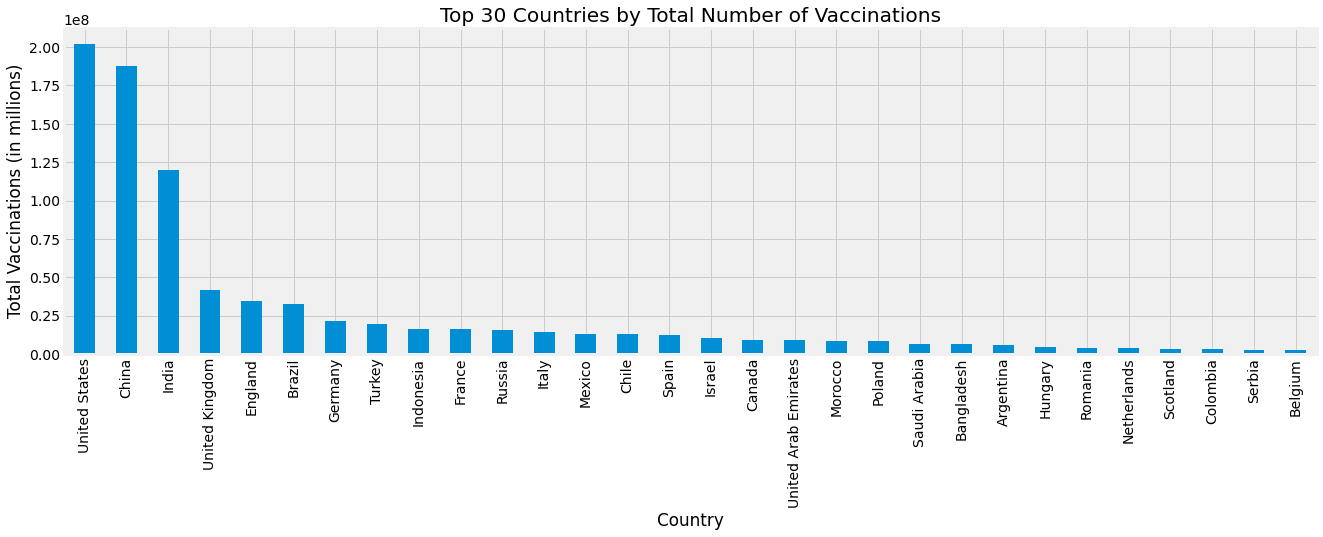

In [440]:
# Plotting countries with the highest number of total vaccinations
# Grouping by country and then sorting the data by the max value from highest to lowest

covid_df_cleaned.groupby(['country'])['total_vaccinations'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6))
plt.title('Top 30 Countries by Total Number of Vaccinations')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations (in millions)');

- **This bar graph shows that United States, China, India and the United Kingdom have the maximum number of available vaccinations. However, this does not mean that all of its population have been vaccinated, as the population size is also high in these countries.**

<a id="q3"></a>
#### Q3. Which countries have vaccinated the largest percentage of its whole population?

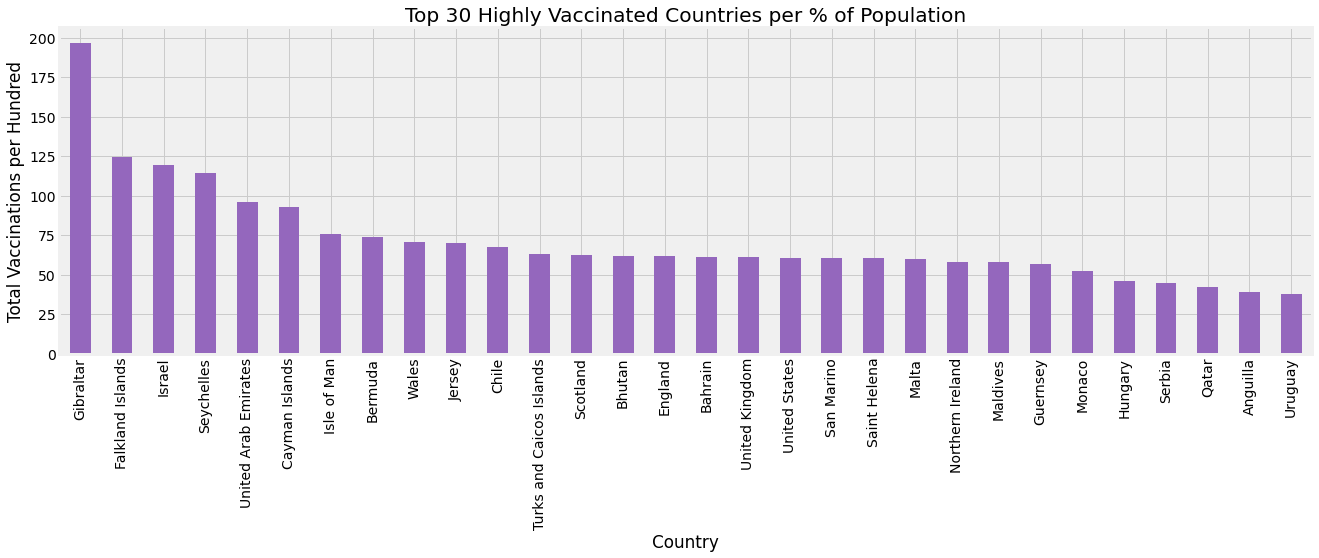

In [442]:
# Plotting countries that vaccinated the largerst percentage of its population

covid_df_cleaned.groupby(['country'])['total_vaccinations_per_hundred'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'tab:purple')
plt.title('Top 30 Highly Vaccinated Countries per % of Population')
plt.xlabel('Country')
plt.ylabel('Total Vaccinations per Hundred');

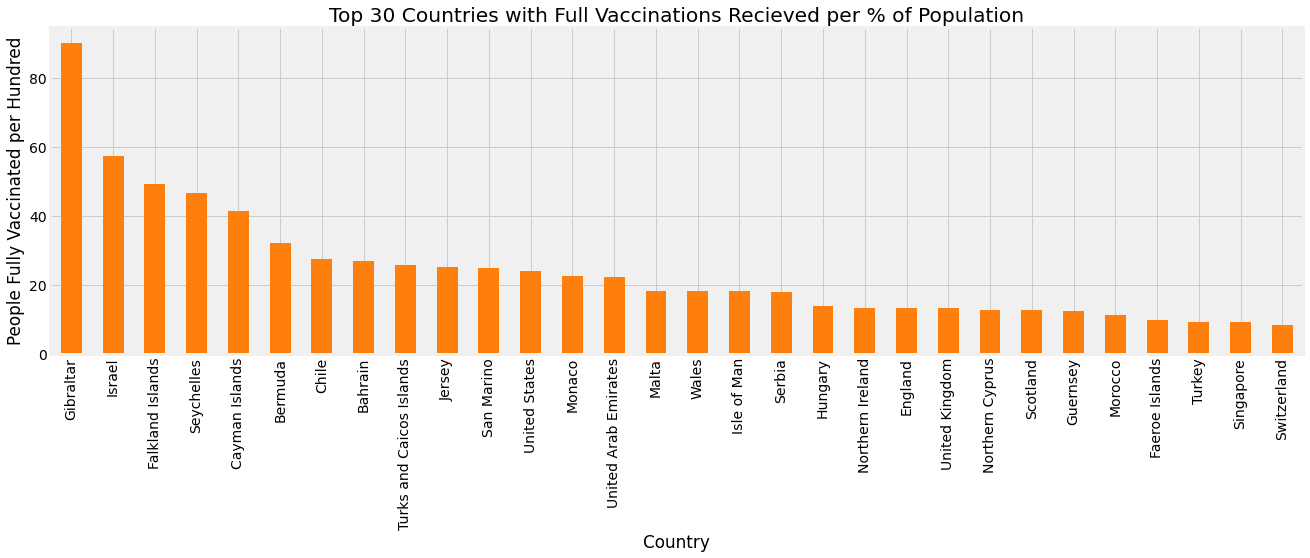

In [444]:
# Plotting countries where population recieved full vaccine doses 

covid_df_cleaned.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'tab:orange')
plt.title('Top 30 Countries with Full Vaccinations Recieved per % of Population')
plt.xlabel('Country')
plt.ylabel('People Fully Vaccinated per Hundred');

- **We can see from these 2 bar graphs that Gibraltar, Falkland Islands, Israel and Seychelles have the highest ratio of total vaccinations, which could be explained by their smaller population size as the vaccination program could have covered all the population faster than other countries.**

<a id="q4"></a>
#### Q4. What are the best performing countries based on daily vaccinations?

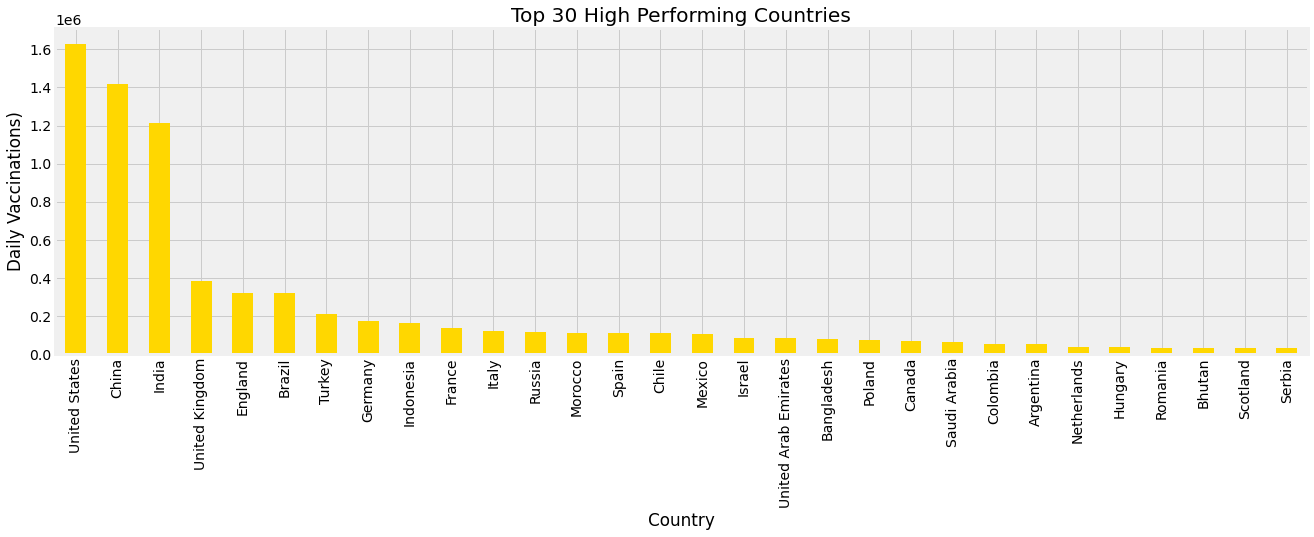

In [523]:
covid_df_cleaned.groupby(['country'])['daily_vaccinations'].mean().sort_values(ascending = False).head(30).plot(kind = 'bar', figsize = (20,6), color = 'gold')
plt.title('Top 30 High Performing Countries')
plt.xlabel('Country')
plt.ylabel('Daily Vaccinations)');

<a id="q5"></a>
#### Q5. Which month saw the hightest number of vaccinations per day?

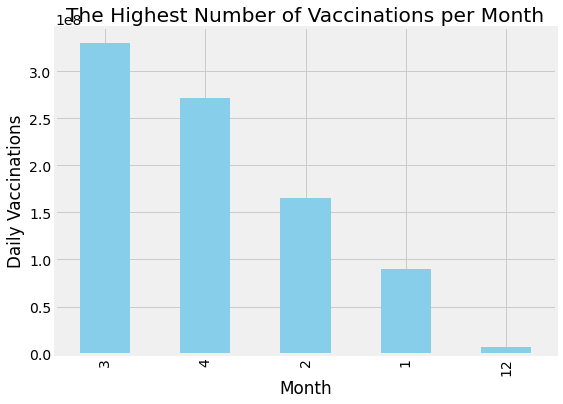

In [446]:
covid_df_cleaned.groupby(['month'])['daily_vaccinations'].sum().sort_values(ascending = False).plot(kind = 'bar', color = 'skyblue')
plt.title('The Highest Number of Vaccinations per Month')
plt.xlabel('Month')
plt.ylabel('Daily Vaccinations');

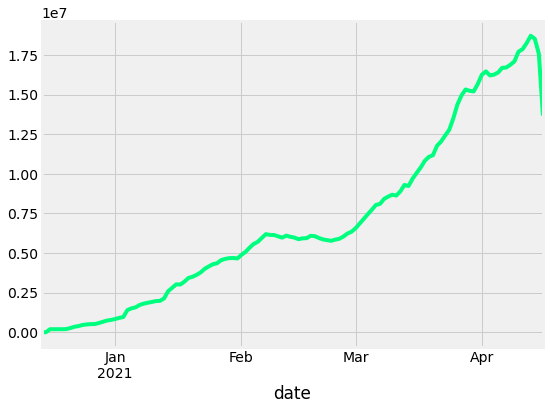

In [447]:
covid_df_cleaned.groupby('date')['daily_vaccinations'].sum().plot(kind = 'line', color = 'springgreen');

<a id="q6"></a>
#### Q6. Which vaccination companies are used the most?

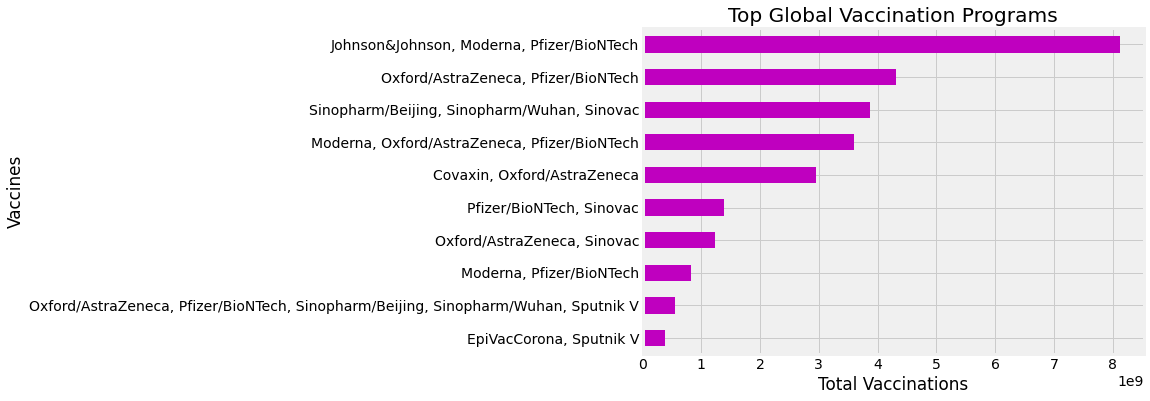

In [451]:
# Which vaccination companies are used the most?

covid_df_cleaned.groupby('vaccines')['total_vaccinations'].sum().sort_values(ascending=False).head(10).plot(kind = 'barh', color = 'm')
plt.gca().invert_yaxis()
plt.title('Top Global Vaccination Programs')
plt.xlabel('Total Vaccinations')
plt.ylabel('Vaccines');


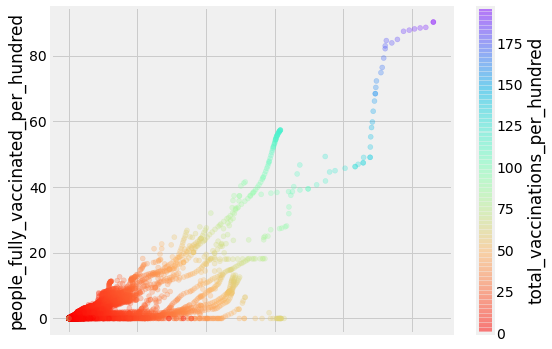

In [448]:
# Plotting a scatterplot 

covid_df_cleaned.plot(kind ='scatter', x = 'people_vaccinated_per_hundred', y= 'people_fully_vaccinated_per_hundred', c ='total_vaccinations_per_hundred', s=25, cmap= 'rainbow_r', alpha=0.3);

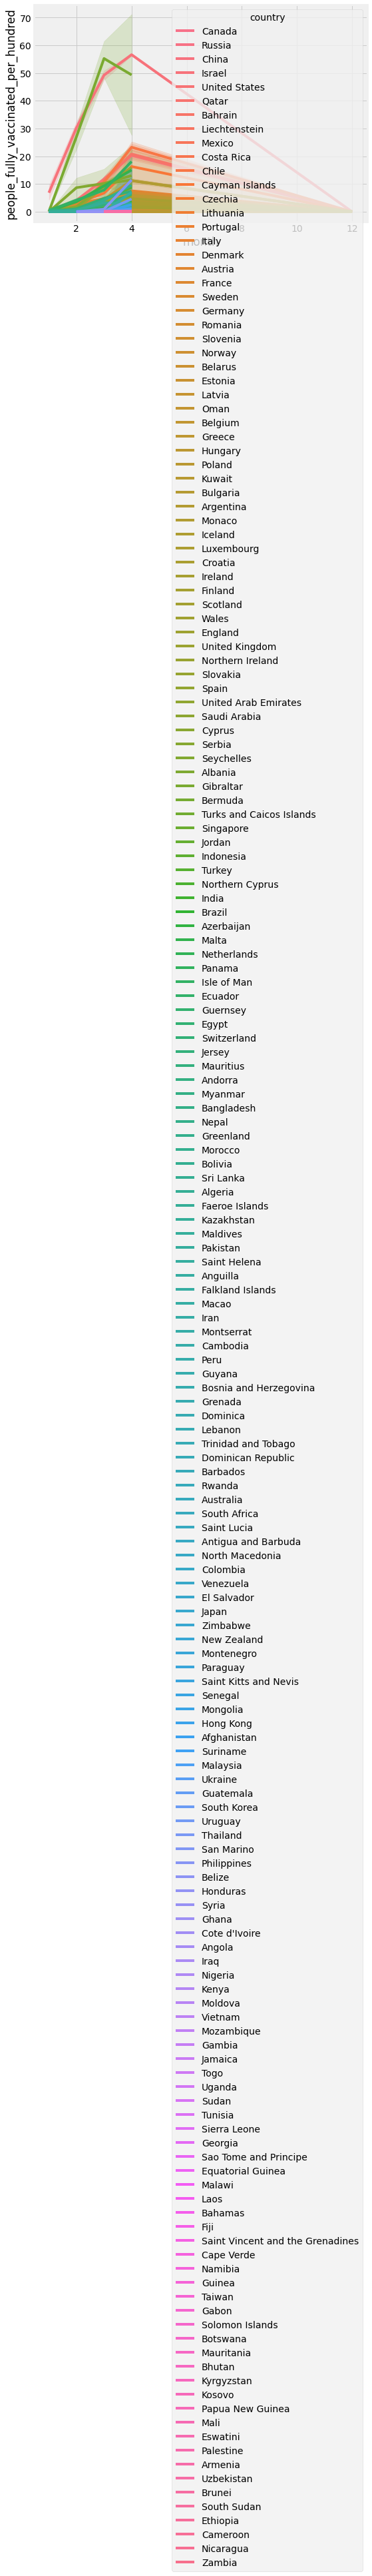

In [528]:
# wanted to try seaborn library - needs more work!

sns.lineplot(data=covid_df_cleaned, x='month', y='people_fully_vaccinated_per_hundred', hue = 'country');

In [ ]:
#Q.How is the vaccine situation like in the Middle East (e.g. in Saudi Arabia) - if I have more time


### Thank You! :)